In [1]:
addprocs(5);

Add `using Distributed` to your imports.
  likely near In[1]:1


In [8]:
using Grid
using Plots
using JuMIT
using LinearAlgebra
gr()

Plots.GRBackend()

In [9]:
pa=J.Gallery.xfwi_problem(:pizza, born_flag=true);

	Seismic Model:	
	> number of samples:	x	51	z	51
	> sampling intervals:	x	40.0	z	40.0
	> vp:	min	2000.0	max	2000.0
	> vp bounds:	min	1700.0	max	2300.0
	> ρ:	min	2000.0	max	2000.0
	> ρ bounds:	min	1700.0	max	2300.0
	Acquisition Geometry:	circular acquisition geometry
	> number of supersources:	5
	> sources per supersource:	min	1	max	1
	> receivers per supersource:	min	20	max	20
	> number of unique positions of:	sources	5	receivers	20
	Source Acquisition:	
	> number of supersources:	5
	> sources per supersource:	min	1	max	1
	> frequency:	min	0.3538461538461538	max	8.846153846153845	peak	2.8307692307692305
	> time:	min	0.0	max	2.8173913043478263
	> samples:	325


┌ Warning: decrease spatial sampling (4.00e+01) below 3.84e+01
└ @ JuMIT.Fdtd /math/home/pawbz/.julia/dev/JuMIT/src/Fdtd/Fdtd.jl:1005


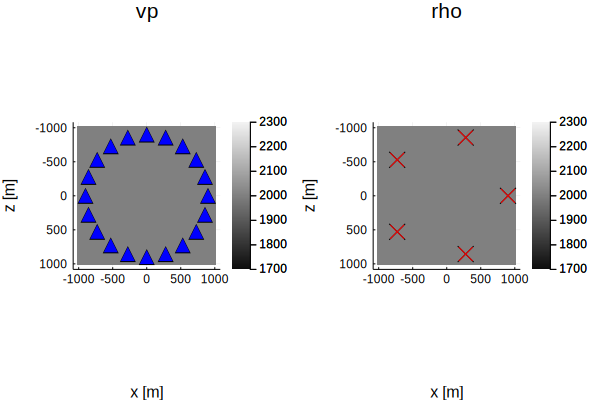

In [10]:
JP.seismic(pa.modm, use_bounds=true)
JP.geom!(pa.acqgeom, markersize=7, subplot=[1,2])

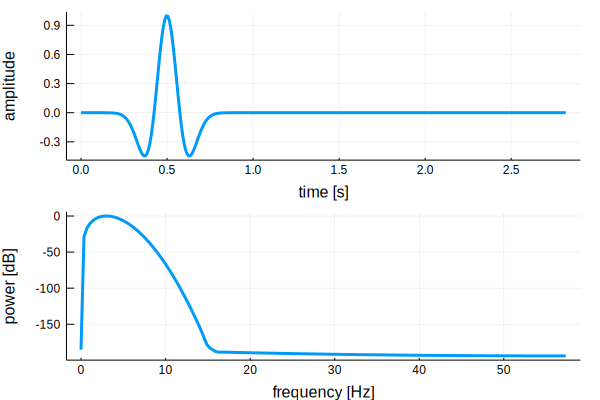

In [11]:
JuMIT.Plots.src(pa.acqsrc, w=3)

In [12]:
F=JF.operator_Born(pa);

In [13]:
function test()
       x=randn(size(F,2))*10e-3
       y=randn(size(F,1))*10e-3
    
       println("adjoint test: ", dot(y,F*x), "\t", dot(x,adjoint(F)*y))
       println("must be positve: ", dot(x, transpose(F)*F*x))
end

test (generic function with 1 method)

In [14]:
for i in 1:10
    test()
end

adjoint test: -0.20219781370263595	-0.20895104020791333
must be positve: 5958.724879207096
adjoint test: -0.3696306599516449	-0.3765656334916391
must be positve: 5274.969248162389
adjoint test: 0.6748172946859148	0.6624927012194841
must be positve: 4737.810170220372
adjoint test: 0.7826766855567301	0.8006214452528618
must be positve: 5032.596015013485
adjoint test: -0.6087304890645877	-0.5921936784736995
must be positve: 6243.760753209214
adjoint test: 1.856865494740299	1.8918177095602984
must be positve: 7267.478836922048
adjoint test: 1.2983622012140466	1.282508937014489
must be positve: 5369.23288231295
adjoint test: -1.4635131991221826	-1.4622959811170821
must be positve: 5103.287171667792
adjoint test: 0.1761774684911196	0.14128095915609398
must be positve: 4129.239838219483
adjoint test: 0.5759016790006964	0.5945329638500371
must be positve: 3908.9486442087823
